In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./clean_data.csv')
df.drop_duplicates(subset=['country'],inplace=True)
df = df.set_index('country')
df.head()

,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,critical_cases,cases_per_million,deaths_per_million,total_tests,...,obesity,median_age,median_age_male,median_age_female,gdp_per_capita,avg_temp_c,area_km,pop_p_km,asl_meters,mobility_composite
country,,,,,,,,,,,,,,,,,,,,,
United States,1686436,NaN,99300.0,NaN,451702.0,1135434.0,17135.0,5098.0,300.0,14749756.0,...,36.2,39.55,38.35,40.65,67426.0,8.55,9833517.0,34.0,760.0,-25.947264
Brazil,365213,#ERROR!,22746.0,30.0,149911.0,192556.0,8318.0,1719.0,107.0,735224.0,...,22.1,32.60,31.10,32.80,17106.0,24.95,8515767.0,25.0,320.0,-30.393815
Russian Federation,344481,NaN,3541.0,NaN,113299.0,227641.0,2300.0,2361.0,24.0,8685305.0,...,23.1,39.60,36.60,42.50,30820.0,-5.10,17125242.0,9.0,600.0,-26.168398
Spain,282852,NaN,28752.0,NaN,196958.0,57142.0,854.0,6050.0,615.0,3556567.0,...,23.8,42.70,41.50,43.90,43007.0,13.30,505990.0,93.0,660.0,-47.459033
United Kingdom,259559,NaN,36793.0,NaN,NaN,NaN,1559.0,3825.0,542.0,3458905.0,...,27.8,40.50,39.30,41.70,48169.0,8.45,242495.0,280.0,162.0,-40.716693


## Correlation Matrix

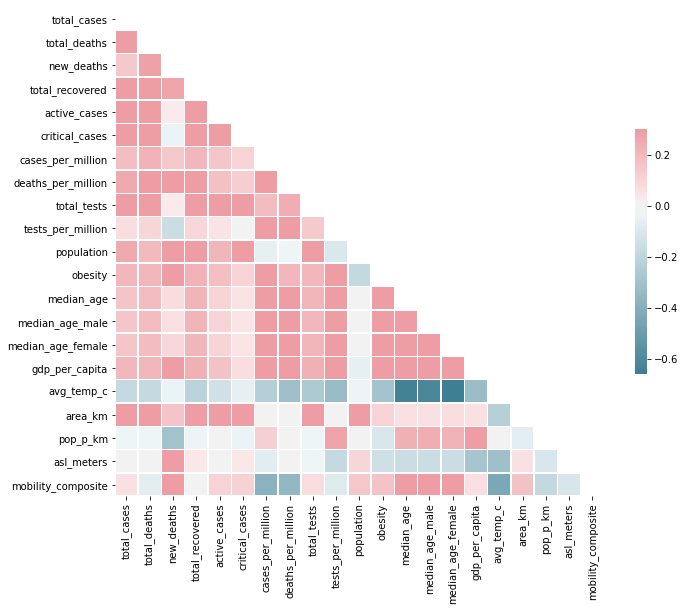

In [3]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
np.fill_diagonal(corr.values, 0)
corr.sort_values(by='deaths_per_million')

,total_cases,total_deaths,new_deaths,total_recovered,active_cases,critical_cases,cases_per_million,deaths_per_million,total_tests,tests_per_million,...,obesity,median_age,median_age_male,median_age_female,gdp_per_capita,avg_temp_c,area_km,pop_p_km,asl_meters,mobility_composite
mobility_composite,0.061094,-0.066446,0.764892,0.013480,0.108571,0.113445,-0.384037,-0.348652,0.073026,-0.086834,...,0.162723,0.339059,0.302684,0.363987,0.069694,-0.439197,0.170492,-0.179114,-0.111218,0.000000
avg_temp_c,-0.176038,-0.175432,-0.039011,-0.215878,-0.134378,-0.053039,-0.232353,-0.311749,-0.260411,-0.330439,...,-0.287938,-0.636137,-0.615143,-0.657549,-0.327350,0.000000,-0.228170,0.008534,-0.306332,-0.439197
population,0.253314,0.196821,0.477154,0.316417,0.211394,0.429433,-0.054859,-0.025927,0.364644,-0.102564,...,-0.182684,0.004107,0.002254,0.004664,-0.052343,-0.034590,0.446953,-0.025204,0.100272,0.146847
asl_meters,0.004565,-0.004864,0.499645,0.034602,0.005681,0.036188,-0.075685,-0.003385,-0.030440,-0.178402,...,-0.141456,-0.159923,-0.153491,-0.158485,-0.286458,-0.306332,0.059665,-0.104993,0.000000,-0.111218
deaths_per_million,0.251855,0.397892,0.428673,0.296880,0.173633,0.130301,0.721245,0.000000,0.240940,0.344083,...,0.207819,0.387560,0.396883,0.377573,0.356477,-0.311749,0.008295,0.016409,-0.003385,-0.348652
area_km,0.525856,0.378253,0.160291,0.534124,0.513209,0.507249,0.009192,0.008295,0.661044,0.011351,...,0.105564,0.067659,0.057938,0.074193,0.060256,-0.228170,0.000000,-0.068909,0.059665,0.170492
pop_p_km,-0.027254,-0.030470,-0.291978,-0.034202,-0.021905,-0.038801,0.125220,0.016409,-0.032423,0.278893,...,-0.107427,0.234216,0.243273,0.224151,0.326850,0.008534,-0.068909,0.000000,-0.104993,-0.179114
critical_cases,0.888431,0.797045,-0.038555,0.809679,0.884673,0.000000,0.110099,0.130301,0.775348,-0.012010,...,0.106908,0.051369,0.047093,0.048805,0.072619,-0.053039,0.507249,-0.038801,0.036188,0.113445
active_cases,0.981096,0.907596,0.027705,0.843815,0.000000,0.884673,0.155372,0.173633,0.886650,0.050804,...,0.181139,0.106838,0.103410,0.106225,0.169672,-0.134378,0.513209,-0.021905,0.005681,0.108571
obesity,0.209304,0.202985,0.503857,0.220582,0.181139,0.106908,0.357246,0.207819,0.209254,0.365795,...,0.000000,0.489164,0.506420,0.459629,0.459188,-0.287938,0.105564,-0.107427,-0.141456,0.162723


In [5]:
ddf = df.apply(pd.to_numeric, errors='coerce')
ddf = ddf.apply(lambda x: (x - x.mean())/x.std(), axis=0)
ddf.fillna(0, inplace=True)
# ddf.dropna(how='any',inplace=True)
ddf

,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,critical_cases,cases_per_million,deaths_per_million,total_tests,...,obesity,median_age,median_age_male,median_age_female,gdp_per_capita,avg_temp_c,area_km,pop_p_km,asl_meters,mobility_composite
country,,,,,,,,,,,,,,,,,,,,,
United States,13.083189,0.0,10.796084,0.000000,10.621955,13.695239,8.874963,1.593211,1.557054,10.455978,...,2.008500,0.974766,0.972356,0.966900,1.806375,-1.162248,4.823210,-0.211548,0.183449,0.978644
Brazil,2.670895,0.0,2.304589,-0.076873,3.344504,2.195888,4.192866,0.204063,0.301909,0.252500,...,0.421723,0.198247,0.123303,0.134221,-0.290783,0.793596,4.130289,-0.217293,-0.530718,0.462753
Russian Federation,2.507510,0.0,0.174339,0.000000,2.461634,2.623785,0.997124,0.467997,-0.237869,6.040669,...,0.534260,0.980352,0.767412,1.163137,0.280767,-2.790131,8.657467,-0.227506,-0.076248,0.952988
Spain,2.021824,0.0,2.970784,0.000000,4.479005,0.544378,0.229254,1.984590,3.605607,2.306618,...,0.613036,1.326713,1.341254,1.311640,0.788678,-0.595769,-0.081546,-0.173888,0.021138,-1.517162
United Kingdom,1.838257,0.0,3.862705,0.000000,0.000000,0.000000,0.603630,1.069865,3.130863,2.235514,...,1.063186,1.080909,1.083611,1.078278,1.003812,-1.174174,-0.220101,-0.054523,-0.787169,-0.734913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Caribbean Netherlands,-0.207229,0.0,0.000000,0.000000,-0.270337,-0.152527,0.000000,-0.408494,0.000000,-0.282482,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
St. Barth,-0.207229,0.0,0.000000,0.000000,-0.270337,-0.152527,0.000000,-0.252683,0.000000,-0.282691,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Anguilla,-0.207252,0.0,0.000000,0.000000,-0.270409,-0.152527,0.000000,-0.420416,0.000000,-0.282769,...,0.000000,0.444051,0.334103,0.547909,0.000000,0.000000,-0.347563,-0.143887,0.000000,0.000000


## Linear Regression Weights

In [6]:
y = ddf['deaths_per_million'].values
keys = list(set(ddf.keys()) - set(['total_deaths','deaths_per_million','median_age']))
x = ddf[keys].values

In [7]:
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.5979307726399512

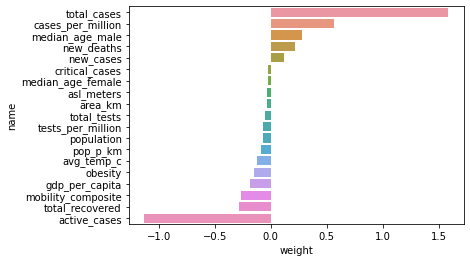

In [8]:
weights = pd.DataFrame({'weight':reg.coef_, 'name':keys})
weights.sort_values(by=['weight'], inplace=True, ascending=False,)
sns.barplot(x="weight", y="name", data=weights)

In [9]:
y = ddf['deaths_per_million'].values
keys = ['obesity', 'gdp_per_capita','avg_temp_c','median_age_male','median_age_female','population','tests_per_million','mobility_composite','asl_meters','pop_p_km']
x = ddf[keys].values

In [10]:
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.26973818219919665

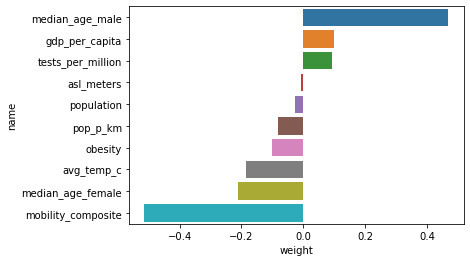

In [11]:
weights = pd.DataFrame({'weight':reg.coef_, 'name':keys})
weights.sort_values(by=['weight'], inplace=True, ascending=False,)
sns.barplot(x="weight", y="name", data=weights)

In [12]:
x.shape

(209, 10)

## Cases per test per million

In [13]:
df['cases_per_test'] = df['total_cases']/df['total_tests']
df.sort_values(by=['cases_per_test'], inplace=True, ascending=False,)
df['cases_per_test'].head()

country
Sudan                    9.526185
Yemen                    1.850000
Sao Tome and Principe    1.434286
Equatorial Guinea        1.124122
Guinea-Bissau            0.742667
Name: cases_per_test, dtype: float64

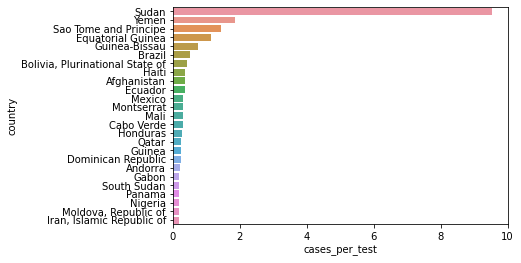

In [14]:
sdf = df.head(25)
sns.barplot(x="cases_per_test", y=sdf.index, data=sdf)

In [15]:
df['cases_per_test_per_million'] = df['cases_per_million']/df['tests_per_million']
df.sort_values(by=['cases_per_test_per_million'], inplace=True, ascending=False,)
df['cases_per_test_per_million'].head()

country
Sudan                    9.666667
Yemen                    1.750000
Sao Tome and Principe    1.435000
Equatorial Guinea        1.124386
Guinea-Bissau            0.743455
Name: cases_per_test_per_million, dtype: float64

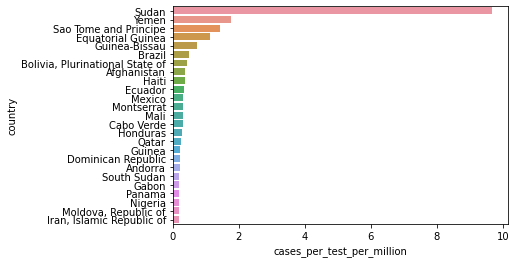

In [16]:
sdf = df.head(25)
sns.barplot(x="cases_per_test_per_million", y=sdf.index, data=sdf)

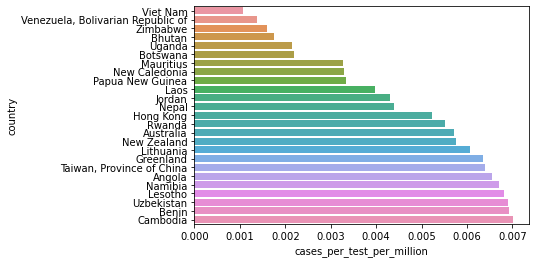

In [17]:
df.sort_values(by=['cases_per_test_per_million'], inplace=True, ascending=True,)
sdf = df.dropna(subset=['cases_per_test_per_million']).head(25)
sns.barplot(x="cases_per_test_per_million", y=sdf.index, data=sdf)